# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.cluster import KMeans as KM
from sklearn.metrics import silhouette_score as ss

In [4]:
#######################################################
kmeans = KM(n_clusters = 8)
wine_clusters = kmeans.fit(X)
wine_clusters = wine_clusters.labels_

In [7]:
ss(X,wine_clusters)

0.5397682873974368

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [5]:
kmeans = KM(n_clusters = 5)
wine_clusters = kmeans.fit(X)
wine_clusters = wine_clusters.labels_

In [9]:
ss(X,wine_clusters)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [6]:
kmeans = KM(n_clusters = 3)
wine_clusters = kmeans.fit(X)
wine_clusters = wine_clusters.labels_

In [11]:
ss(X,wine_clusters)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [7]:
from yellowbrick.cluster import KElbowVisualizer as KEV

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


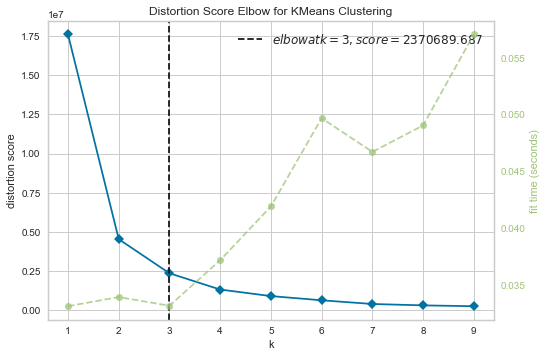

In [20]:
#modelo = kmeans.KM()
model = KM()
visual = KEV(model, k = (1,10), metric = 'distortion')

visual.fit(X);

visual.poof();

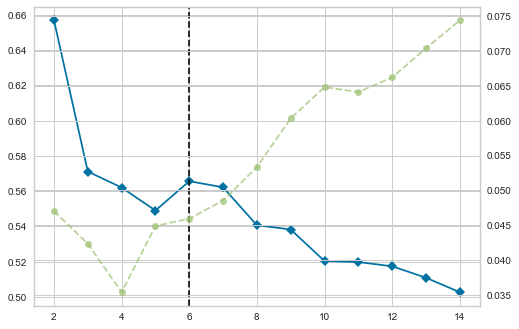

In [31]:
model2=KM()
visual2 = KEV(model2, k = (2,15), metric = 'silhouette')

visual2.fit(X);
visual.poof();

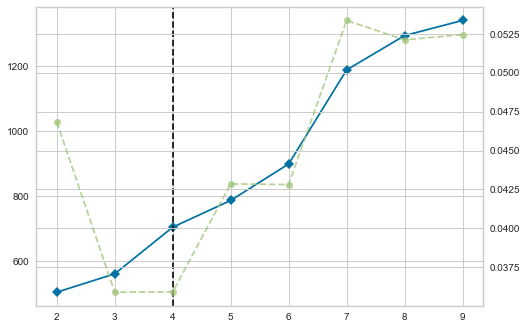

In [15]:
model3=KM()
visual3 = KEV(model3, k = (2,10), metric = 'calinski_harabasz')

visual3.fit(X);
visual.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [22]:
from sklearn.cluster import AgglomerativeClustering as AC

In [ ]:
modelo2 =AC()

visual2 = KElbowVisualizer(modelo2, k = (1,10), metric = 'distortion')

visual2.fit(X)

visual2.poof();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [43]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


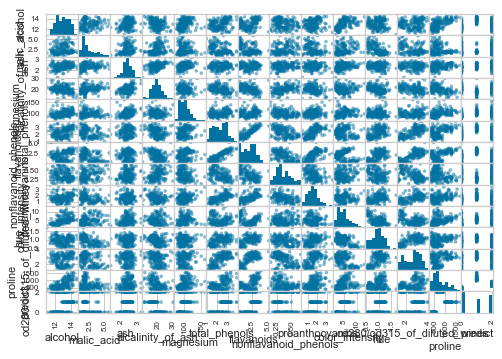

In [11]:
##model_KM = KMeans(n_cluster = 4)

kmeans = KM(n_clusters = 3)
wine_clusters = kmeans.fit(X)
wine_clusters = wine_clusters.labels_

matrix = pd.DataFrame(X, columns = X.columns)
matrix['predict'] = wine_clusters

pd.plotting.scatter_matrix(matrix);

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [8]:
from sklearn.decomposition import PCA

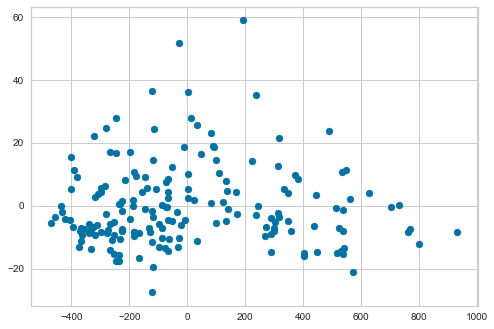

In [9]:
d_2 = PCA(n_components = 2)
d_2_s = d_2.fit_transform(X)
d_2_s_pd = pd.DataFrame(d_2_s)

plt.scatter(pd.DataFrame(d_2_s_pd)[0], pd.DataFrame(d_2_s_pd)[1]);

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [55]:
from sklearn.manifold import TSNE

In [64]:
tsne = TSNE(n_components = 2, verbose = True)
tsne_fit = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 17.680442
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.118824
[t-SNE] KL divergence after 750 iterations: 0.110313


In [65]:
pd.DataFrame(tsne_fit)

,0,1
0,-7.287754,-9.689847
1,-6.494537,-9.965681
2,-8.479231,-11.658308
3,-10.553870,-13.650496
4,-0.831039,-3.692355
...,...,...
173,-0.519503,-4.011009
174,-0.868356,-4.274142
175,-2.965281,-5.883268
176,-3.147512,-5.937747


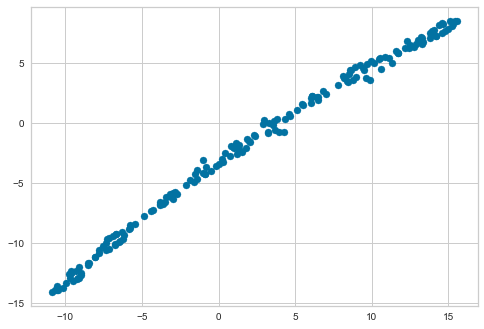

In [66]:
plt.scatter(pd.DataFrame(tsne_fit)[0], pd.DataFrame(tsne_fit)[1]);